In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
# read the data
df = pd.read_csv('myvolume/subject/data04/Train_knight.csv')

# add column knight_numeric for cast column to numeric
df['knight_numeric'] = df['knight'].map({'Jedi': 1, 'Sith': 0})

# drop the original knight column
df.drop(columns=['knight'], inplace=True)

# rename knight_numeric to knight
df.rename(columns={'knight_numeric': 'knight'}, inplace=True)

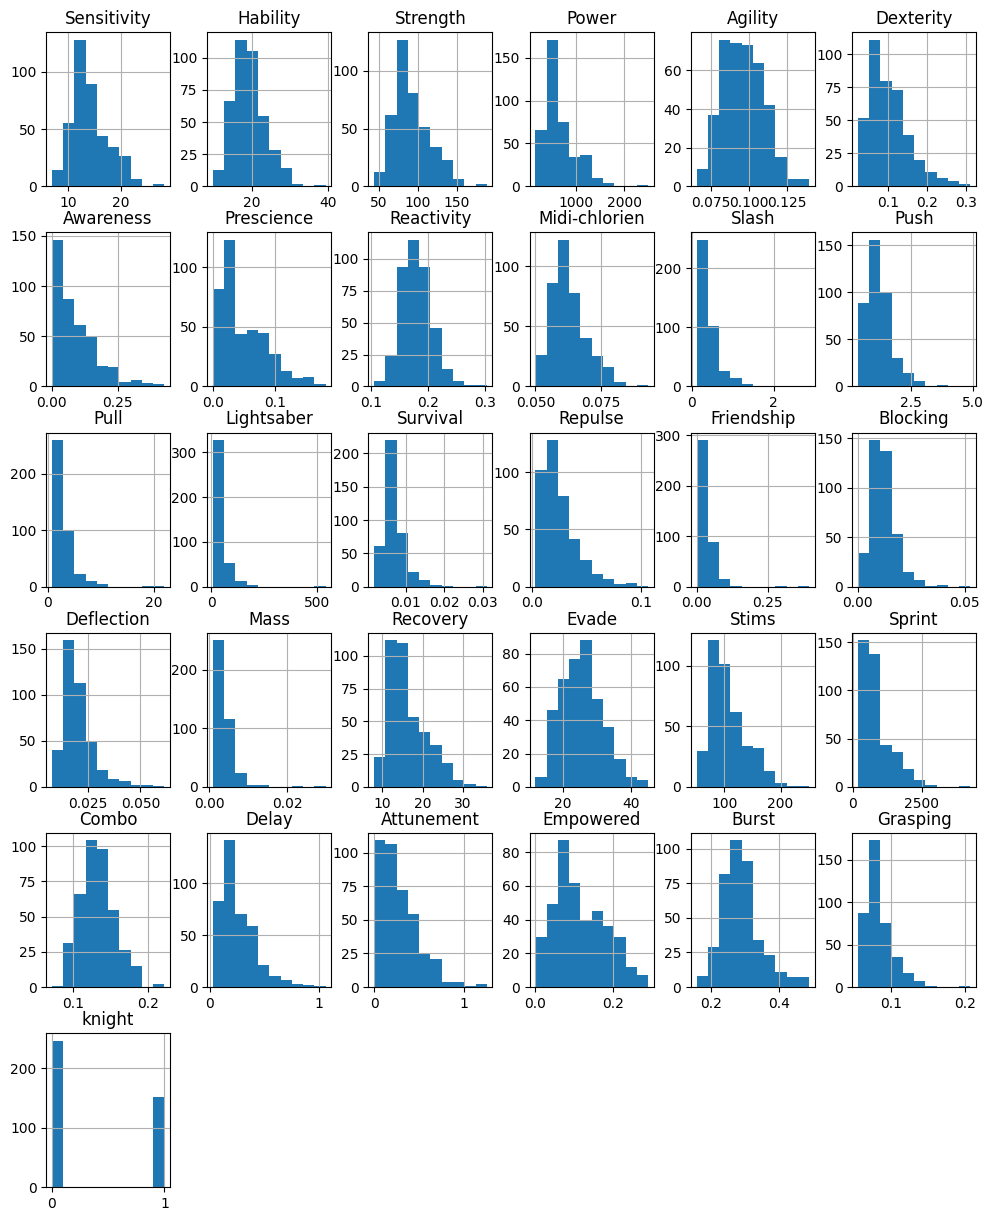

In [18]:
df.hist(layout=(6, 6), figsize=(12, 15))
plt.show()

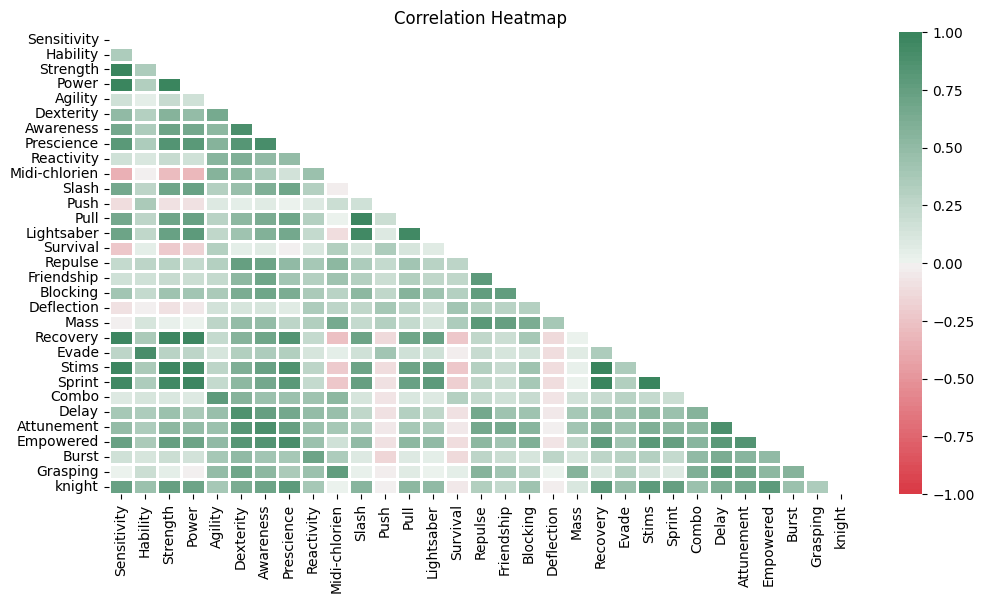

In [19]:
dcorr = df.corr()

mask = np.zeros_like(dcorr)

# mask shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, mask=mask, ax=ax)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# this code is commented out to avoid running it
# sns.pairplot(df, vars=columns, hue='knight', markers='o', plot_kws={'alpha': 0.5})

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score for standardization 

In [57]:
scale = StandardScaler()
X_scaled = scale.fit_transform(df)
X_scaled[0:, 3]

array([-6.47079360e-01,  1.79870899e+00, -8.25470396e-01, -7.15305071e-01,
       -7.76442396e-01,  1.10168442e+00,  1.93780372e-01,  1.63035984e+00,
        1.66284827e+00, -4.60713891e-01, -7.41886517e-01,  1.97296514e+00,
       -3.65611385e-01, -6.71593360e-01, -9.35340372e-01, -4.55988301e-01,
       -7.51337697e-01, -8.20449456e-01, -5.63200132e-01, -2.14687844e-01,
        8.20511791e-01, -5.15353530e-01, -1.18994639e-01, -2.59876301e-01,
       -2.12325049e-01,  2.76773552e-01, -6.64504975e-01,  1.79603601e-01,
       -5.14762831e-01, -1.19849668e+00, -3.56750904e-01, -1.92241290e-01,
       -9.84959070e-01, -7.82644734e-01, -6.04844397e-01, -1.49415627e-01,
        1.50939868e-02, -6.19316517e-01, -7.47202806e-01,  4.78497190e-01,
       -6.22875552e-02, -2.71099579e-01,  2.57265650e-02, -2.35953000e-01,
        1.84005791e+00, -4.05483554e-01, -6.36151433e-01, -1.05288943e+00,
        4.92378612e-01, -4.87886036e-01, -7.36865577e-01, -6.41467722e-01,
       -9.37407817e-01,  

In [59]:
df[['Power']]

,Power
0,431.9
1,1260.0
2,371.5
3,408.8
4,388.1
...,...
393,224.5
394,559.2
395,412.5
396,298.3


In [44]:
print(df['Power'].describe())
df['Power'].T

count     398.000000
mean      650.989447
std       339.008193
min       143.500000
25%       424.200000
50%       552.600000
75%       798.550000
max      2501.000000
Name: Power, dtype: float64


0       431.9
1      1260.0
2       371.5
3       408.8
4       388.1
        ...  
393     224.5
394     559.2
395     412.5
396     298.3
397    1207.0
Name: Power, Length: 398, dtype: float64

In [23]:
df.describe()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,Slash,Push,Pull,Lightsaber,Survival,Repulse,Friendship,Blocking,Deflection,Mass,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.097661,19.115025,91.772362,650.989447,0.096415,0.103716,0.089318,0.049001,0.180104,0.062618,0.406642,1.209762,2.874453,40.532000,0.007011,0.025183,0.032036,0.011881,0.020163,0.003737,16.239711,25.521558,107.093794,873.852010,0.132790,0.256784,0.276759,0.115806,0.288324,0.083987,0.381910
std,3.422475,4.155107,23.561861,339.008193,0.013605,0.051021,0.079026,0.037671,0.026528,0.006633,0.286517,0.550578,2.098937,47.610186,0.002922,0.016649,0.031853,0.006200,0.007378,0.002553,4.653383,5.986852,32.418532,537.413359,0.022889,0.160271,0.215459,0.065403,0.057770,0.018468,0.486466
min,6.981000,9.710000,43.790000,143.500000,0.065760,0.023440,0.000000,0.000000,0.106000,0.049960,0.114400,0.360200,0.757000,7.254000,0.001713,0.003012,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.742500,16.172500,75.467500,424.200000,0.086012,0.064605,0.029500,0.020362,0.161600,0.057710,0.231925,0.828900,1.574000,17.757500,0.005219,0.013135,0.015010,0.007958,0.015200,0.002252,13.060000,21.042500,84.377500,518.900000,0.116650,0.147325,0.116475,0.065320,0.250125,0.071887,0.000000
50%,13.375000,18.700000,86.890000,552.600000,0.095895,0.094120,0.064315,0.034190,0.178800,0.061360,0.327500,1.127000,2.330000,25.095000,0.006391,0.020500,0.026245,0.011100,0.018635,0.003217,15.050000,25.245000,98.135000,698.750000,0.131400,0.211850,0.229800,0.102800,0.281350,0.079870,0.000000
75%,16.027500,21.537500,105.550000,798.550000,0.106100,0.130475,0.132375,0.074670,0.194475,0.066188,0.483175,1.460750,3.390750,46.332500,0.008033,0.032508,0.041403,0.014898,0.022908,0.004488,19.087500,29.312500,127.050000,1092.250000,0.146650,0.341600,0.387550,0.162225,0.317250,0.092162,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.139800,0.311400,0.426400,0.182300,0.304000,0.092960,2.873000,4.885000,21.980000,542.200000,0.031130,0.106400,0.396000,0.052790,0.061460,0.029840,36.040000,44.870000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.488200,0.207500,1.000000


In [ ]:
# mean
scale.mean_

array([1.40976608e+01, 1.91150251e+01, 9.17723618e+01, 6.50989447e+02,
       9.64151256e-02, 1.03715528e-01, 8.93179842e-02, 4.90007286e-02,
       1.80104271e-01, 6.26183668e-02, 4.06641709e-01, 1.20976206e+00,
       2.87445276e+00, 4.05320000e+01, 7.01068844e-03, 2.51833719e-02,
       3.20357075e-02, 1.18810804e-02, 2.01631935e-02, 3.73667839e-03,
       1.62397111e+01, 2.55215578e+01, 1.07093794e+02, 8.73852010e+02,
       1.32789975e-01, 2.56783995e-01, 2.76759447e-01, 1.15806387e-01,
       2.88323618e-01, 8.39867839e-02, 3.81909548e-01])

In [25]:
# variance
scale.var_

array([1.16839049e+01, 1.72215356e+01, 5.53766421e+02, 1.14637795e+05,
       1.84642942e-04, 2.59663655e-03, 6.22947875e-03, 1.41551438e-03,
       7.01962620e-04, 4.38912699e-05, 8.18854645e-02, 3.02374721e-01,
       4.39446582e+00, 2.26103453e+03, 8.51473085e-06, 2.76490857e-04,
       1.01205608e-03, 3.83485993e-05, 5.42946582e-05, 6.50111952e-06,
       2.15995692e+01, 3.57523393e+01, 1.04832061e+03, 2.88087457e+05,
       5.22597234e-04, 2.56223092e-02, 4.63058331e-02, 4.26678481e-03,
       3.32901708e-03, 3.40204921e-04, 2.36054645e-01])